# Car Prices

🎯 The goal of this challenge is to prepare a dataset and apply some feature selection techniques that you have learned so far.

🚗 We are dealing with a dataset about cars and we would like to predict whether a car is expensive or cheap.

In [1]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

❓ Go ahead and load the CSV into a dataframe called `df`

In [2]:
import pandas as pd
df = pd.read_csv(url)
df.head()

(205, 9)

ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

## (1) Duplicates

❓ Remove the duplicates from the dataset if there are any. ❓

*Overwite the dataframe `df`*

In [3]:
df = df.drop_duplicates()
df.duplicated().sum()

0

## (2) Missing values

❓ Find the missing values and impute them either with `strategy = "most frequent"` (categorical variables) or `strategy = "median"` (numerical variables) ❓


In [4]:
df.isna().sum()

aspiration         0
enginelocation    10
carwidth           2
curbweight         0
enginetype         0
cylindernumber     0
stroke             0
peakrpm            0
price              0
dtype: int64

In [5]:
print(df['enginelocation'].unique())
print(df['carwidth'].unique())

['front' nan 'rear']
['64.1' '65.5' nan '66.4' '66.3' '71.4' '67.9' '64.8' '66.9' '70.9' '60.3'
 '*' '63.6' '63.8' '64.6' '63.9' '64' '65.2' '66' '61.8' '69.6' '70.6'
 '64.2' '65.7' '66.5' '66.1' '70.3' '71.7' '70.5' '72' '68' '64.4' '65.4'
 '68.4' '68.3' '65' '72.3' '66.6' '63.4' '65.6' '67.7' '67.2' '68.9'
 '68.8']


### `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [6]:
from sklearn.impute import SimpleImputer
import numpy as np

df['carwidth'].replace('*', np.nan, inplace=True) 

imputer = SimpleImputer(strategy="mean") 

imputer.fit(df[['carwidth']]) 

df['carwidth'] = imputer.transform(df[['carwidth']])

### `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [7]:
imputer = SimpleImputer(strategy="most_frequent") 

imputer.fit(df[['enginelocation']]) 

df['enginelocation'] = imputer.transform(df[['enginelocation']])

In [8]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

🧪 **Test your code**

In [9]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_carwidth PASSED         [ 50%]
test_missing_values.py::TestMissing_values::test_engine_location PASSED  [100%]

============================== 2 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



## (3) Scaling the numerical features

❓ **Question: Scaling the numerical features** ❓

Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scaler
- Standard Scaler

Replace the original columns with the transformed values.

### `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

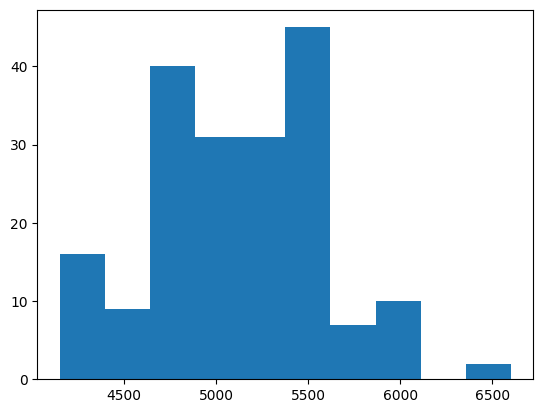

In [10]:
from matplotlib import pyplot as plt
plt.hist(df['peakrpm'])
plt.show()

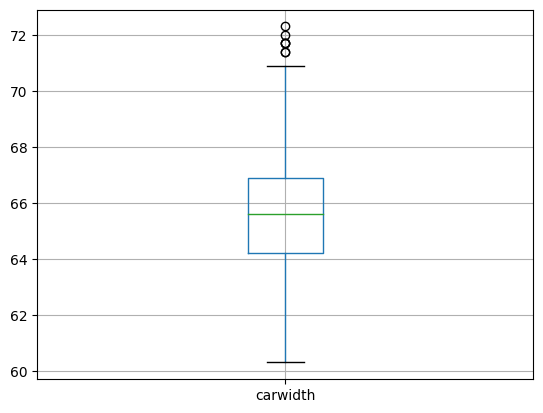

In [11]:
df[['carwidth']].boxplot()
plt.show()

In [12]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler() 

scaler.fit(df[['peakrpm']])
df['peakrpm'] = scaler.transform(df[['peakrpm']])

scaler.fit(df[['carwidth']])
df['carwidth'] = scaler.transform(df[['carwidth']])

scaler.fit(df[['stroke']])
df['stroke'] = scaler.transform(df[['stroke']])

### `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

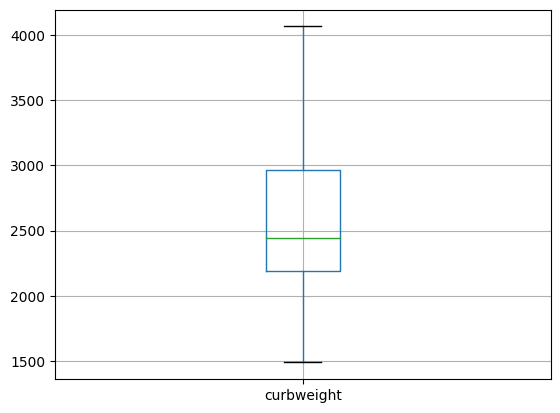

In [13]:
df[['curbweight']].boxplot()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

scaler.fit(df[['curbweight']])
df['curbweight'] = scaler.transform(df[['curbweight']])


🧪 **Test your code**

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 4 items

test_scaling.py::TestScaling::test_carwidth PASSED                       [ 25%]
test_scaling.py::TestScaling::test_curbweight PASSED                     [ 50%]
test_scaling.py::TestScaling::test_peakrpm PASSED                        [ 75%]
test_scaling.py::TestScaling::test_stroke PASSED                         [100%]

============================== 4 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



## (4) Encoding the categorical features

❓ **Question: encoding the categorical variables** ❓

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features with their encoded version(s).

In [16]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.555556,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,-0.037037,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.139339,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.296296,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.259259,-0.126260,ohc,five,0.366667,0.571429,expensive


### `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [22]:
print(df['aspiration'].unique())
print(df['enginelocation'].unique())

[0 1]
[0 1]


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [19]:
le.fit(df[['aspiration']])

df['aspiration'] = le.transform(df[['aspiration']])

/Users/florencetersier/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/florencetersier/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
le.fit(df[['enginelocation']])

df['enginelocation'] = le.transform(df[['enginelocation']])

/Users/florencetersier/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/florencetersier/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0,0,-0.555556,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0,0,-0.037037,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0,0,0.139339,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0,0,0.296296,0.478302,ohc,five,0.366667,0.571429,expensive
5,0,0,0.259259,-0.126260,ohc,five,0.366667,0.571429,expensive


### `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [23]:
print(df['enginetype'].unique())

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [25]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)

ohe.fit(df[['enginetype']]) 

df[ohe.categories_[0]] = ohe.transform(df[['enginetype']]) 

df.drop(columns='enginetype', inplace=True)

In [26]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,-0.555556,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,-0.037037,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0.139339,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0.296296,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0,0,0.259259,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `cylindernumber`

<details>
    <summary>💡 Hint </summary>

ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded into numeric.

</details>

In [27]:
print(df['cylindernumber'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [30]:
def numeric_encoding(str):
    if str == 'two':
        return 2
    if str == 'three':
        return 3
    if str == 'four':
        return 4
    if str == 'five':
        return 5
    if str == 'six':
        return 6
    if str == 'eight':
        return 8
    if str == 'twelve':
        return 12

In [31]:
df['cylindernumber'] = df['cylindernumber'].apply(lambda x: numeric_encoding(x))

In [32]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,-0.555556,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,-0.037037,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0.139339,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0.296296,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0,0,0.259259,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


❓ Now that you've made `cylindernumber` into a numeric feature between 2 and 12, you need to scale it.

<br/>

<details>
    <summary>💡 Hint </summary>

Ordinal numeric features should be normalized (using MinMaxScaler).
</details>

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 

scaler.fit(df[['cylindernumber']])
df['cylindernumber'] = scaler.transform(df[['cylindernumber']])

### `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [34]:
print(df['price'].unique())

['expensive' 'cheap']


In [35]:
le = LabelEncoder()

le.fit(df[['price']])

df['price'] = le.transform(df[['price']])

/Users/florencetersier/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/florencetersier/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,-0.555556,-0.048068,0.2,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,-0.037037,0.476395,0.4,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,0.139339,-0.450474,0.2,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0.296296,0.478302,0.3,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0,0,0.259259,-0.126260,0.3,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


🧪 **Test your code**

In [37]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_aspiration PASSED                   [ 25%]
test_encoding.py::TestEncoding::test_enginelocation PASSED               [ 50%]
test_encoding.py::TestEncoding::test_enginetype PASSED                   [ 75%]
test_encoding.py::TestEncoding::test_price PASSED                        [100%]

============================== 4 passed in 0.23s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



## (5) Base Modelling

👏 The dataset has been preprocessed and is now ready to be fitted to a model. 

❓**Question: a first attempt to evaluate a classification model** ❓

Cross-validate a `LogisticRegression` on this preprocessed dataset and save its score under a variable named `base_model_score`.

In [38]:
df.head(2)

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,-0.555556,-0.048068,0.2,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,-0.037037,0.476395,0.4,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = df.drop(columns='price')
y = df['price']

model = LogisticRegression()

cv_results = cross_validate(model, X, y, cv=5)
base_model_score = cv_results['test_score'].mean()
base_model_score

0.8639676113360324

🧪 **Test your code**

In [40]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (6) Feature Selection

👩🏻‍🏫 A powerful way to detect whether a feature is relevant or not to predict a target is to:
1. Run a model and score it
2. Shuffle this feature, re-run the model and score it
    - If the performance significantly dropped, the feature is important and you shoudn't have dropped it
    - If the performance didn't decrease a lot, the feature may be discarded.

❓ **Questions** ❓

1. Perform a feature permutation to detect which features bring the least amount of information to the model. 
2. Remove the weak features from your dataset until you notice model performance dropping substantially
3. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [41]:
from sklearn.inspection import permutation_importance

model = LogisticRegression()
model.fit(X, y) 

permutation_score = permutation_importance(model, X, y, n_repeats=10)

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 

importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False)

,feature,score decrease
3,curbweight,0.301047
2,carwidth,0.111518
5,stroke,0.032984
11,ohcf,0.019895
6,peakrpm,0.012042
10,ohc,0.008377
0,aspiration,0.00733
7,dohc,0.005236
13,rotor,0.005236
12,ohcv,0.001047


In [54]:
X = df.drop(columns=['price'])
X = X.drop(columns=['dohcv', 'l', 'cylindernumber', 'enginelocation', 'ohcv', 'rotor', 'dohc', 'aspiration', 'ohc', 'peakrpm', 'ohcf', 'stroke'])

y = df['price']

model = LogisticRegression()

cv_results = cross_validate(model, X, y, cv=5)
strong_model_score = cv_results['test_score'].mean()
strong_model_score

0.9006747638326585

🧪 **Test your code**

In [53]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/florencetersier/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/florencetersier/code/FDLData/data-car-prices/tests
plugins: anyio-3.6.1, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_strong_model.py::TestStrong_model::test_strong_model_score PASSED   [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master



## Bonus - Stratifying your data ⚖️

💡 As we split our data into training and testing, we need to be mindful of the proportion of categorical variables in our dataset - whether it's the classes of our target `y` or a categorical feature in `X`.

Let's have a look at an example 👇

❓ Split your original `X` and `y` into training and testing data, using sklearn's `train_test_split`; use `random_state=1` and `test_size=0.3` to have comparable results.

In [88]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price','dohcv', 'l', 'cylindernumber', 'enginelocation', 'ohcv', 'rotor', 'dohc', 'aspiration', 'ohc', 'peakrpm', 'ohcf', 'stroke'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


❓ Check the proportion of `price` class `1` cars in your training dataset and testing dataset.

> _If you check the proportion of them in the raw `df`, it should be very close to 50/50_

In [89]:
df['price'].value_counts()

1    97
0    94
Name: price, dtype: int64

In [90]:
print(len(y_train[y_train==1])/len(y_train))
print(len(y_test[y_test==1])/len(y_test))

0.5037593984962406
0.5172413793103449


It should still be pretty close to 50/50 ☝️ 

❓ **But** what if we change the random state? Loop through random states 1 through 10, each time calculating the share of `price` class `1` cars in the training and testing data.

In [98]:
price_of_1_train = []
price_of_1_test = []

for rd in range(1,11,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rd)
    price_of_1_train.append(round(len(y_train[y_train==1])/len(y_train),2))
    price_of_1_test.append(round(len(y_test[y_test==1])/len(y_test),2))

print(price_of_1_train)
print(price_of_1_test)

[0.5, 0.48, 0.5, 0.53, 0.53, 0.5, 0.53, 0.49, 0.58, 0.49]
[0.52, 0.57, 0.52, 0.45, 0.45, 0.53, 0.45, 0.55, 0.34, 0.55]


You'll find the proportion changes every time - sometimes quite drastically 😱 This can affect model performance.

❓ Compare the test score of a logistic regression when trained using `train_test_split(random_state=1)` versus `random_state=9`. (remember to fit on training data and score on testing data)

In [99]:
X = df.drop(columns=['price','dohcv', 'l', 'cylindernumber', 'enginelocation', 'ohcv', 'rotor', 'dohc', 'aspiration', 'ohc', 'peakrpm', 'ohcf', 'stroke'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression()

model.fit(X_train, y_train)
model.score(X_test,y_test)


0.9482758620689655

In [100]:
X = df.drop(columns=['price','dohcv', 'l', 'cylindernumber', 'enginelocation', 'ohcv', 'rotor', 'dohc', 'aspiration', 'ohc', 'peakrpm', 'ohcf', 'stroke'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

model = LogisticRegression()

model.fit(X_train, y_train)
model.score(X_test,y_test)


0.8448275862068966

👀 You should see a much lower score with `random_state=9` because the proportion of class `1` cars in that test set is quite far from the training or the original dataset (34/57 vs. the original 50/50).

This is substantial, as this accidental imbalance in our dataset can not only make model performance worse, but also distort the "reality" during training or scoring 🧐

### So how do we fix this? 🔧

🎁 Luckily, this is taken care of by `cross_validate` in sklearn, when the estimator (a.k.a the model) is a classifier and the target is a class. Check out the documentation of `cv` parameter in [cross_validate docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

#### It is done through something called [**stratification**](https://scikit-learn.org/stable/modules/cross_validation.html#stratification) 👈

We can also do during a `train_test_split` by passing a **`stratify`** parameter!

❓ Run through the same 1 to 10 random state loop again, but this time also pass `stratify=y` into the holdout method.

In [101]:
price_of_1_train = []
price_of_1_test = []

for rd in range(1,11,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rd, stratify=y)
    price_of_1_train.append(round(len(y_train[y_train==1])/len(y_train),2))
    price_of_1_test.append(round(len(y_test[y_test==1])/len(y_test),2))

print(price_of_1_train)
print(price_of_1_test)

[0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


👀 Even as random state is changing the proportion of classes inside the training and testing data is kept the same as in the original `y`. This is what _stratification_ is.

Using `train_test_split` with the `stratify` parameter, we can also preserve proportions of a feature across training and testing data. This can be extremely important, for example:

- preserving proportion of male and female customers in predicting churn 🙋‍♂️ 🙋
- preserving the proportion big and small houses in predicting their prices 🏠 🏰
- preserving distribution of 1-5 review scores (multiclass!) in recommending the next product 🛍️
- etc...

For instance, in our dataset, to holdout the same share of `aspiration` feature in both training and testing data, we could simply write `train_test_split(X, y, test_size=0.3, stratify=X.aspiration)`

---

As we saw, **`cross_validate` [can automatically stratify the target](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#:~:text=For%20int/None%20inputs%2C%20if%20the%20estimator%20is%20a%20classifier%20and%20y%20is%20either%20binary%20or%20multiclass%2C%20StratifiedKFold%20is%20used.), but not the features...** 🤔 We need a bit of extra work for that.

## We need `StratifiedKFold` 🔬

[StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) allows us to split the data into `k` splits, while stratifying on certain columns (features or target).

This way we can do a manual cross-validation while keeping proportions on the categorical features of interest - let's try it with the binary `aspiration` feature:

In [103]:
X = df.drop(columns=['price','dohcv', 'l', 'cylindernumber', 'enginelocation', 'ohcv', 'rotor', 'dohc', 'ohc', 'peakrpm', 'ohcf', 'stroke'])
y = df['price']

In [104]:
from sklearn.model_selection import StratifiedKFold

# initializing a stratified k-fold that will split the data into 5 folds
skf = StratifiedKFold(n_splits=5)
scores = []

# .split() method creates an iterator; 'X.aspiration' is the feature that we stratify by
for train_indices, test_indices in skf.split(X, X.aspiration):
    
    # 'train_indices' and 'test_indices' are lists of indices that produce proportional splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # initialize and fit a model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # append a score to get an average of 5 folds in the end
    scores.append(model.score(X_test, y_test))
    
np.array(scores).mean()

0.8951417004048583

Some sklearn reads on **stratification**:

- [Visualization of how different holdout methods in sklearn work](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)
- [Overall cross-validation and stratification understanding](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

🏁 Congratulations! You have prepared a whole dataset, ran feature selection and even learned about stratification 💪

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!